In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("dataset/case_time_series.csv",parse_dates=['Date_YMD'], index_col=['Date_YMD'])

In [3]:
print(data.head())

                       Date  Daily Confirmed  Total Confirmed  \
Date_YMD                                                        
2020-01-30  30 January 2020                1                1   
2020-01-31  31 January 2020                0                1   
2020-02-01  1 February 2020                0                1   
2020-02-02  2 February 2020                1                2   
2020-02-03  3 February 2020                1                3   

            Daily Recovered  Total Recovered  Daily Deceased  Total Deceased  
Date_YMD                                                                      
2020-01-30                0                0               0               0  
2020-01-31                0                0               0               0  
2020-02-01                0                0               0               0  
2020-02-02                0                0               0               0  
2020-02-03                0                0               0          

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 641 entries, 2020-01-30 to 2021-10-31
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             641 non-null    object
 1   Daily Confirmed  641 non-null    int64 
 2   Total Confirmed  641 non-null    int64 
 3   Daily Recovered  641 non-null    int64 
 4   Total Recovered  641 non-null    int64 
 5   Daily Deceased   641 non-null    int64 
 6   Total Deceased   641 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 40.1+ KB
None


In [5]:
DC = data["Daily Confirmed"].resample("2D").max() #Stores Daily Confirmed
TC = data["Total Confirmed"]
DR = data["Daily Recovered"].resample("2D").max() #Stores Daily Recovered
TR = data["Total Recovered"]
DD = data["Daily Deceased"].resample("2D").max() #Stores Daily Deceased
TD = data["Total Deceased"]

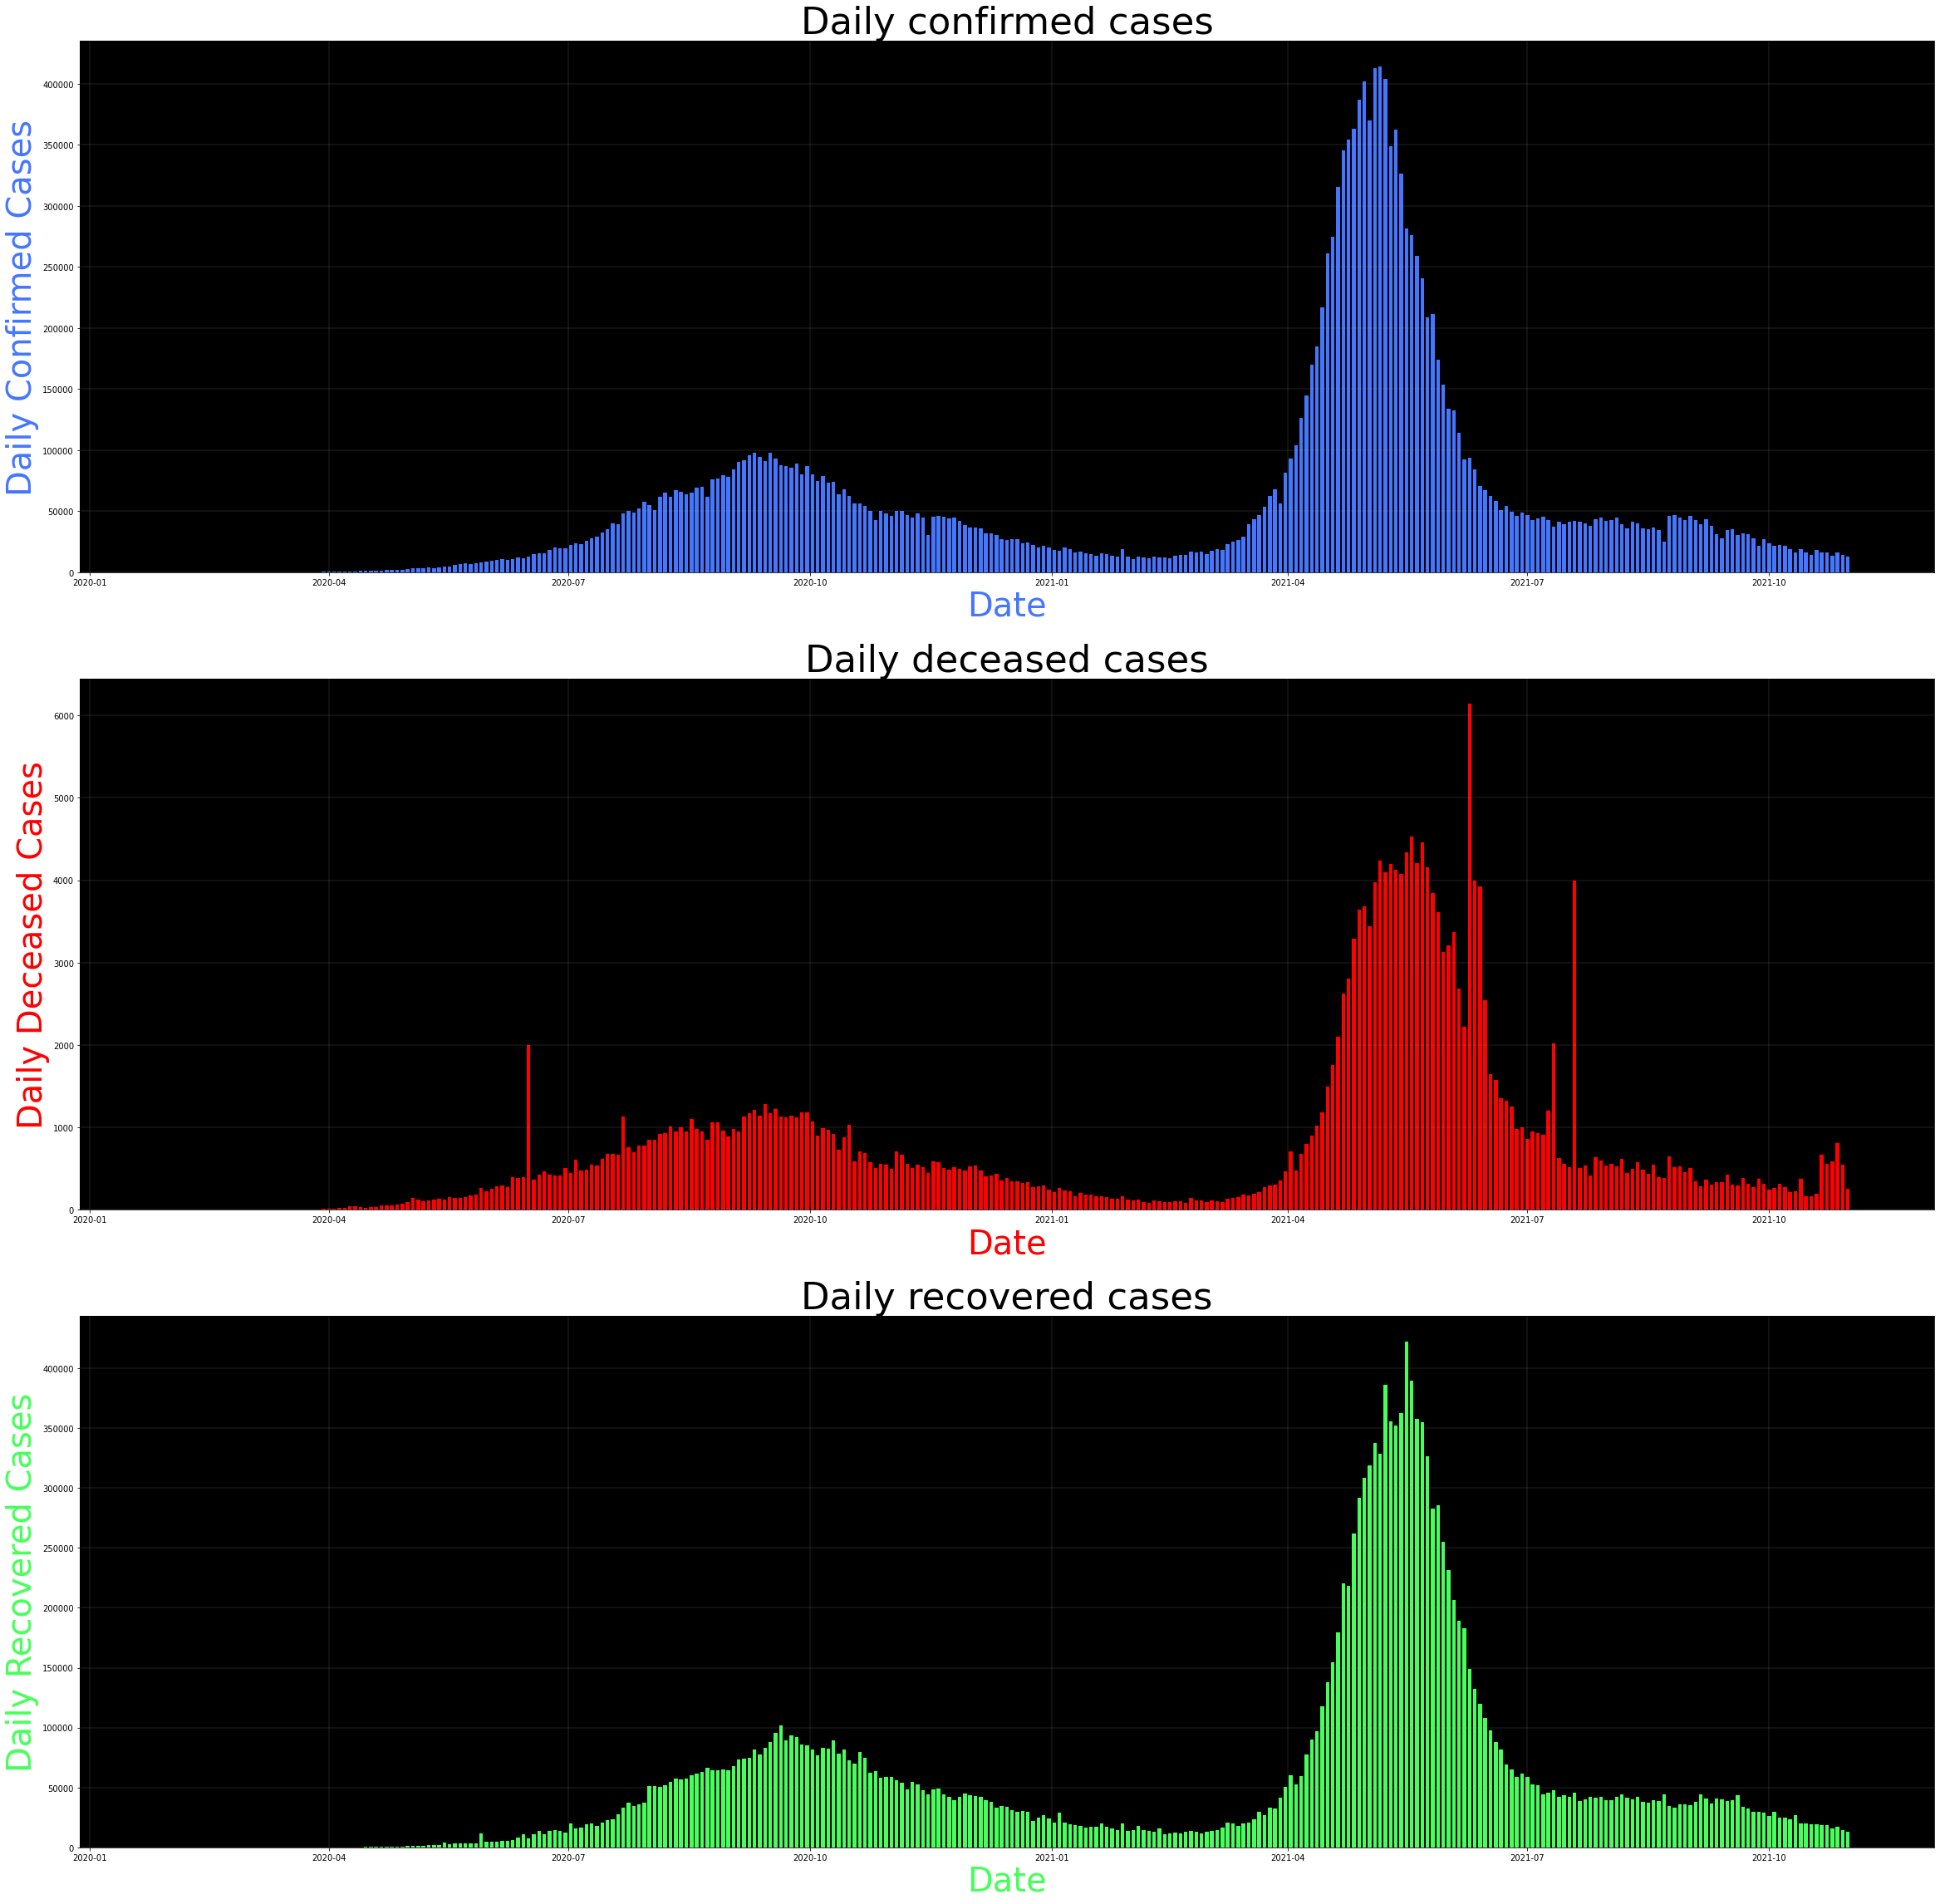

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(40,40))

ax1.grid(linewidth=0.2, color='#adadad') 
ax1.set_facecolor("black")
ax1.set_xlabel('Date',size=40, color='#4576ff')
ax1.set_ylabel('Daily Confirmed Cases', size=40,color='#4576ff')
ax1.set_title("Daily confirmed cases", fontsize=45)
ax1.bar(DC.index, DC, color='#4576ff', width=1.4)

ax2.grid(linewidth=0.2, color='#adadad') 
ax2.set_facecolor("black")
ax2.set_xlabel('Date',size=40, color='red')
ax2.set_ylabel('Daily Deceased Cases', size=40,color='red')
ax2.set_title("Daily deceased cases", fontsize=45)
ax2.bar(DD.index, DD, color='red', width=1.4)

ax3.grid(linewidth=0.2, color='#adadad') 
ax3.set_facecolor("black")
ax3.set_xlabel('Date',size=40, color='#47ff5a')
ax3.set_ylabel('Daily Recovered Cases', size=40,color='#47ff5a')
ax3.set_title("Daily recovered cases", fontsize=45)
ax3.bar(DD.index, DR, color='#47ff5a', width=1.4)

plt.savefig('daily.jpg', dpi=300)
plt.show()

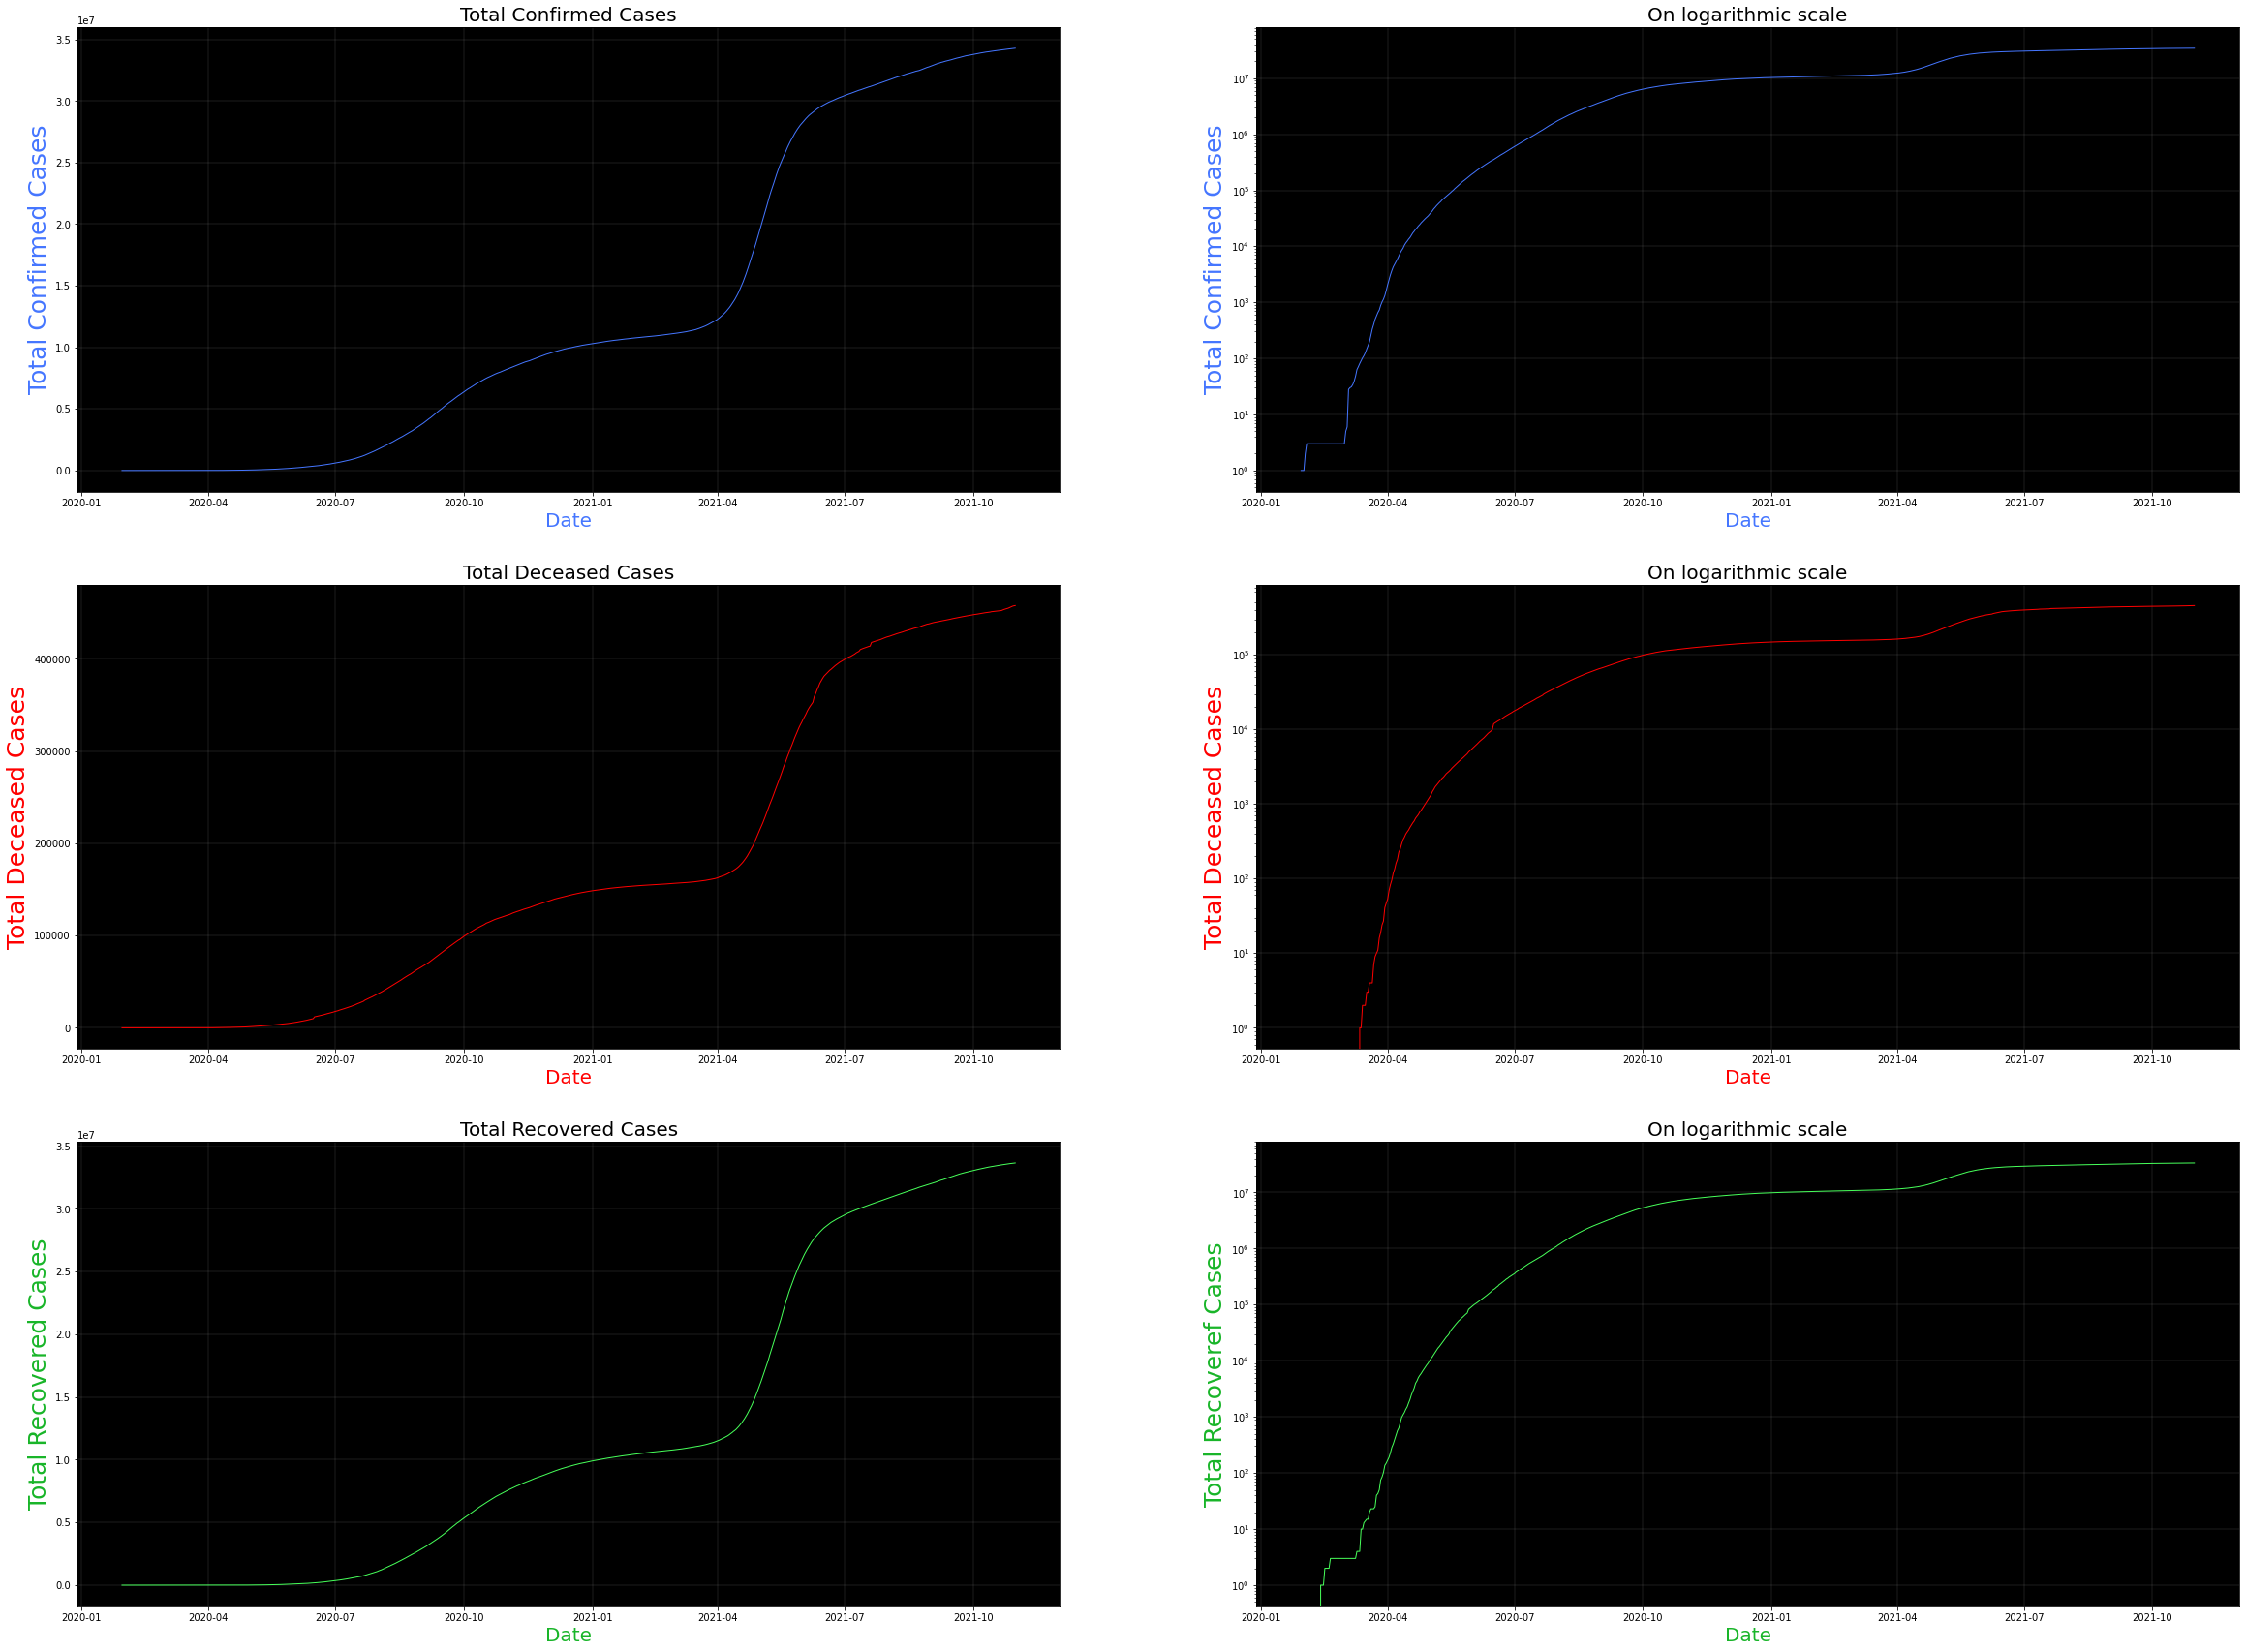

In [7]:
fig, ((ax4, ax5), (ax6, ax7), (ax8, ax9)) = plt.subplots(3, 2, figsize=(40,30))

#Total Confirmed Cases
ax4.grid(linewidth=0.2, color='#8f8f8f') 
ax4.set_facecolor("black")
ax4.set_xlabel('Date',size=20, color='#4576ff')
ax4.set_ylabel('Total Confirmed Cases', size=25,color='#4576ff')
ax4.set_title('Total Confirmed Cases', fontsize=20)
ax4.plot(data.index, TC, color='#4576ff', linewidth=1)

ax5.set_yscale("log")
ax5.grid(linewidth=0.2, color='#8f8f8f') 
ax5.set_facecolor("black")
ax5.set_xlabel('Date',size=20, color='#4576ff')
ax5.set_ylabel('Total Confirmed Cases', size=25,color='#4576ff')
ax5.set_title('On logarithmic scale', fontsize=20)
ax5.plot(data.index, TC,color='#4576ff', linewidth=1)

#Total Deceased Cases
ax6.grid(linewidth=0.2, color='#8f8f8f') 
ax6.set_facecolor("black")
ax6.set_xlabel('Date',size=20, color='red')
ax6.set_ylabel('Total Deceased Cases', size=25,color='red')
ax6.set_title('Total Deceased Cases', fontsize=20)
ax6.plot(data.index, TD, color='red', linewidth=1)

ax7.set_yscale("log")
ax7.grid(linewidth=0.2, color='#8f8f8f') 
ax7.set_facecolor("black")
ax7.set_xlabel('Date',size=20, color='red')
ax7.set_ylabel('Total Deceased Cases', size=25,color='red')
ax7.set_title('On logarithmic scale', fontsize=20)
ax7.plot(data.index, TD, color='red', linewidth=1)

#Total Recovered Cases
ax8.grid(linewidth=0.2, color='#8f8f8f') 
ax8.set_facecolor("black")
ax8.set_xlabel('Date',size=20, color='#19b529')
ax8.set_ylabel('Total Recovered Cases', size=25,color='#19b529')
ax8.set_title('Total Recovered Cases', fontsize=20)
ax8.plot(data.index, TR, color='#47ff5a', linewidth=1)


ax9.set_yscale("log")
ax9.grid(linewidth=0.2, color='#8f8f8f') 
ax9.set_facecolor("black")
ax9.set_xlabel('Date',size=20, color='#19b529')
ax9.set_ylabel('Total Recoveref Cases', size=25,color='#19b529')
ax9.set_title('On logarithmic scale', fontsize=20)
ax9.plot(data.index, TR, color='#47ff5a', linewidth=1)

plt.savefig('total.jpg', dpi=300)
plt.show()


# State wise Graphs

In [8]:
state_data = pd.read_csv("dataset/state_wise_daily.csv",parse_dates=['Date_YMD'], index_col=['Date_YMD'])

In [9]:
print(state_data.head())

                 Date     Status  TT  AN  AP  AR  AS  BR  CH  CT  ...  PB  RJ  \
Date_YMD                                                          ...           
2020-03-14  14-Mar-20  Confirmed  81   0   1   0   0   0   0   0  ...   1   3   
2020-03-14  14-Mar-20  Recovered   9   0   0   0   0   0   0   0  ...   0   1   
2020-03-14  14-Mar-20   Deceased   2   0   0   0   0   0   0   0  ...   0   0   
2020-03-15  15-Mar-20  Confirmed  27   0   0   0   0   0   0   0  ...   0   1   
2020-03-15  15-Mar-20  Recovered   4   0   0   0   0   0   0   0  ...   0   2   

            SK  TN  TG  TR  UP  UT  WB  UN  
Date_YMD                                    
2020-03-14   0   1   1   0  12   0   0   0  
2020-03-14   0   0   0   0   4   0   0   0  
2020-03-14   0   0   0   0   0   0   0   0  
2020-03-15   0   0   2   0   1   0   0   0  
2020-03-15   0   0   1   0   0   0   0   0  

[5 rows x 41 columns]


In [10]:
print(state_data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1791 entries, 2020-03-14 to 2021-10-31
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1791 non-null   object
 1   Status  1791 non-null   object
 2   TT      1791 non-null   int64 
 3   AN      1791 non-null   int64 
 4   AP      1791 non-null   int64 
 5   AR      1791 non-null   int64 
 6   AS      1791 non-null   int64 
 7   BR      1791 non-null   int64 
 8   CH      1791 non-null   int64 
 9   CT      1791 non-null   int64 
 10  DN      1791 non-null   int64 
 11  DD      1791 non-null   int64 
 12  DL      1791 non-null   int64 
 13  GA      1791 non-null   int64 
 14  GJ      1791 non-null   int64 
 15  HR      1791 non-null   int64 
 16  HP      1791 non-null   int64 
 17  JK      1791 non-null   int64 
 18  JH      1791 non-null   int64 
 19  KA      1791 non-null   int64 
 20  KL      1791 non-null   int64 
 21  LA      1791 non-null   int64 
 22  LD    

In [11]:
states = ["BR", "UP", "DL", "PB"]
state_data_confirmed_daily = state_data[states].iloc[::3]



In [12]:
print(state_data_confirmed_daily.head())

            BR  UP  DL  PB
Date_YMD                  
2020-03-14   0  12   7   1
2020-03-15   0   1   0   0
2020-03-16   0   0   0   0
2020-03-17   0   2   1   0
2020-03-18   0   2   2   1


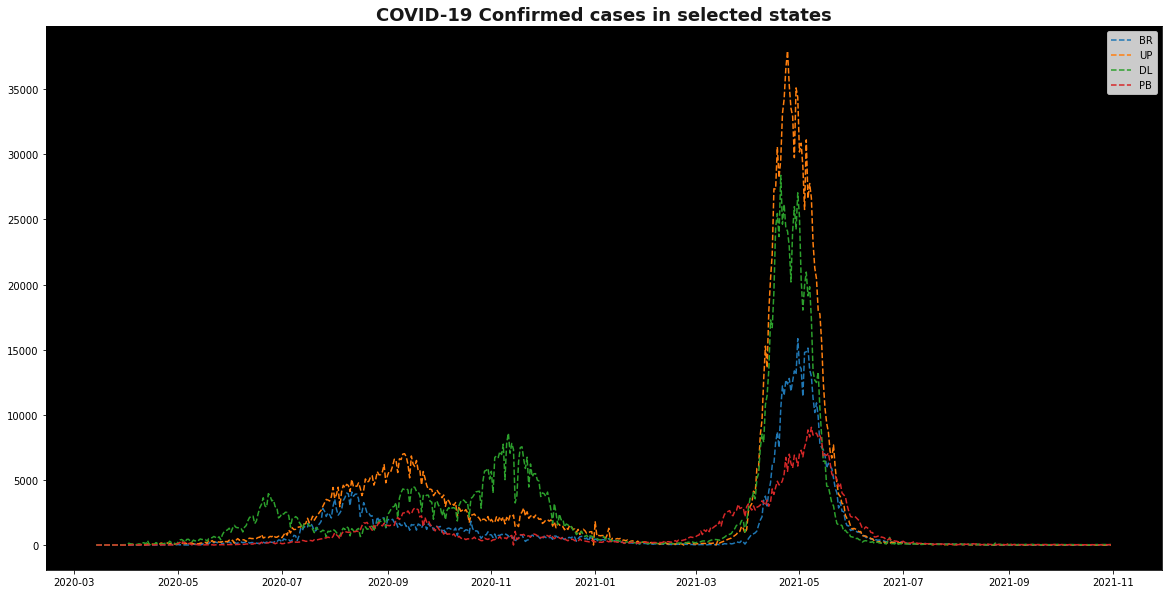

In [13]:
x = state_data_confirmed_daily.index
plt.figure(figsize=(20,10))
ax9 = plt.axes()
for y in states:
    ax9.plot(x, state_data_confirmed_daily[y],linestyle='dashed' , label = y)

ax9.set_facecolor("black")
plt.title('COVID-19 Confirmed cases in selected states', fontsize=18, weight='bold', alpha=0.9)
plt.legend()

plt.savefig('State_plot.jpg', dpi=300)
plt.show()

In [14]:
state_data_confirmed_total = state_data.iloc[::3,2:].sum(axis=0)
state_data_confirmed_total = state_data_confirmed_total.drop(labels=['TT'])


In [15]:
others = 0
for i in state_data_confirmed_total.iteritems():
    if i[1]<100000:
        others += i[1]
        state_data_confirmed_total = state_data_confirmed_total.drop(labels=i[0])


In [16]:
state_data_confirmed_total = state_data_confirmed_total.append(pd.Series([others], index=['Others']))

In [17]:
print(state_data_confirmed_total.head())
print("Total number of States: {}" .format(state_data_confirmed_total.size))
print("Average cases: %10.2f" %state_data_confirmed_total.mean())

AP    2066450
AS     610543
BR     726098
CT    1006052
DL    1439870
dtype: int64
Total number of States: 27
Average cases: 1269805.96


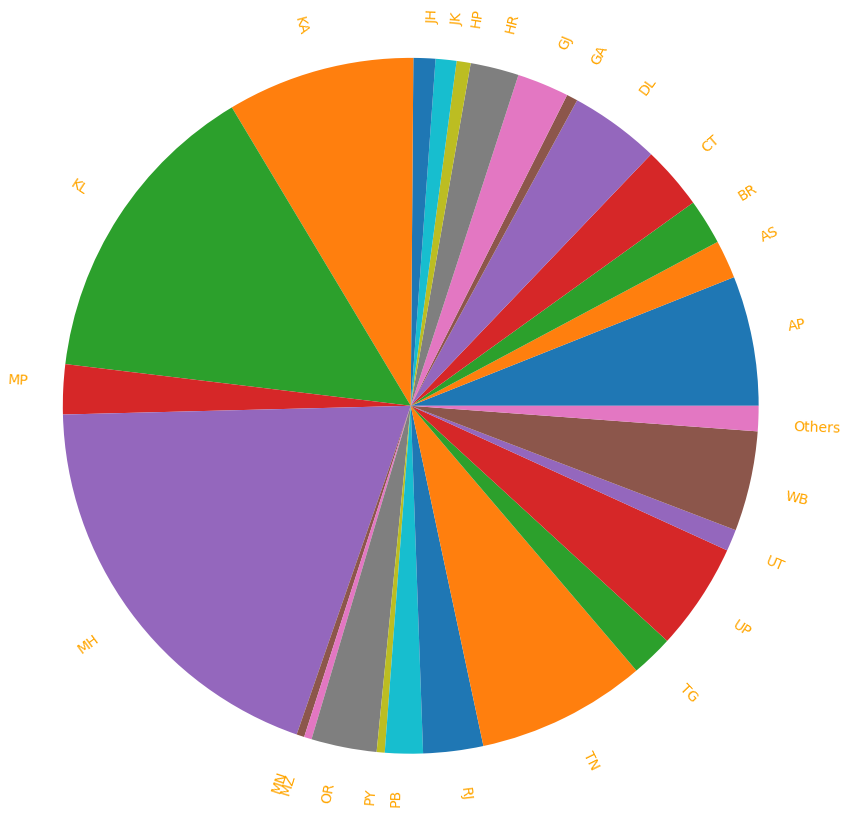

In [18]:
plt.pie(state_data_confirmed_total, labels=state_data_confirmed_total.index.tolist(),textprops=dict(size=14,color='orange'), rotatelabels=True, radius=4)
plt.savefig('State_pie.jpg',  dpi=300, bbox_inches = 'tight')
plt.show()